In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=13FWvDchGTaBOVoni491PGxPdLF9vEelU'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('clean_dataset_final.csv')  

13FWvDchGTaBOVoni491PGxPdLF9vEelU


In [ ]:
import pandas as pd
fields = ['Product', 'Narrative']
data = pd.read_csv('clean_dataset_final.csv', usecols=fields)
pd.set_option('max_colwidth', 1000)
data.head()

,Product,Narrative
0,Consumer Loan,"i purchased a new car on . the car dealer called citizens bank to get a 10 day payoff on my loan, good till . the dealer sent the check the next day. when i balanced my checkbook on . i noticed that citizens bank had taken the automatic payment out of my checking account at bank. i called citizens and they stated that they did not close the loan until . ( stating that they did not receive the check until . . ). i told them that i did not believe that the check took that long to arrive. told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( , ) i called citizens bank again and talked to a supervisor named , because on . i received a letter that the loan had been paid in full ( dated , ) but no refund check was included. stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed. the .. i questioned her about the delay in posting the dealer payment and ..."
1,Mortgage,"started the refinance of home mortgage process with cash out option on 2016. necessary documents were submitted by . after initial review, got good faith estimate with loan amount and closing cost. based on this estimate, a deposit of was made towards appraisal. appraisal came with lesser amount by . agreed to reduce the loan amount to that extent. however, got a revised estimate which was less by and with additional closing cost towards points etc. in between got numerous revised estimates with different loan amounts and closing cost. it took more than 2 months to reach any definite closing document. hence, want to get back the deposit of ."
2,Credit card,"was a happy card member for years, in late 2016 converted the card portfolio to barclaycard ( ). we almost never carry a balance over, but we started to in and barclay has been overcharging the interest expense every month. instead of charging interest on the carried balance they charged it on the entire average balance. so if we charged last month and carried from previous months then they charged us 15 % of the = , should have been in interest charges. they are double dipping, getting the interchange fee ( 1.5 % of purchase, equal to an 18 % apr ), plus they are getting the interest on the purchases at 15 %, that is the equivalent of an 33 % interest charge. \ni feel this practice is very unethical, if not illegal. we converted, not by our choice, from to barclaycard mastercard, so if we leave we lose all the points we acquired in previous years. completely unfair and is why the big financials have the hated reputation they have now. hope you folks over there can investi..."
3,Credit card,"without provocation, i received notice that my credit line was being decreased by nearly 100 %. my available credit was reduced from $ to ( the rough amount of my available balance ). \n\nwhen i called to question the change, i was provided a nob-descript response referencing my report. it was my understanding that under the fcra i was entitled to a copy of this report, but was refused by citi and have been given no further explanation. \n\nthis is predatory in that it affects my utilization of credit, further subjecting me to increase in aprs, etc and a higher cost of credit without any reason."
4,Debt collection,"i am writing to request your assistance in looking into the deceptive practices of this collection law-firm above. it appears that they are using tactics that may be violating consumer protection law in debt collection practices depriving consumers of their rights to dispute. \n\n1 in , i received a notice from the above company, the next day, i contacted their offices as instructed -- the memo dated instruct me to contact the plaintiff attorney, not the court. i followed the instructions provided and contacted the plaintiff attorney by phone and also faxed a letter on disputing the debt ( see letter ). \n\n2. the company responded with a letter dated by send

In [ ]:
category_codes = {
    'Bank account or service' : 0,
    'Consumer Loan' : 1,
    'Credit card' : 2,
    'Credit reporting' : 3,
    'Debt collection' : 4,
    'Mortgage' : 5,
    'Student loan' : 6
}
data['category_id']=data['Product']
data = data.replace({'category_id':category_codes})
data.head()

,Product,Narrative,category_id
0,Consumer Loan,"i purchased a new car on . the car dealer called citizens bank to get a 10 day payoff on my loan, good till . the dealer sent the check the next day. when i balanced my checkbook on . i noticed that citizens bank had taken the automatic payment out of my checking account at bank. i called citizens and they stated that they did not close the loan until . ( stating that they did not receive the check until . . ). i told them that i did not believe that the check took that long to arrive. told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( , ) i called citizens bank again and talked to a supervisor named , because on . i received a letter that the loan had been paid in full ( dated , ) but no refund check was included. stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed. the .. i questioned her about the delay in posting the dealer payment and ...",1
1,Mortgage,"started the refinance of home mortgage process with cash out option on 2016. necessary documents were submitted by . after initial review, got good faith estimate with loan amount and closing cost. based on this estimate, a deposit of was made towards appraisal. appraisal came with lesser amount by . agreed to reduce the loan amount to that extent. however, got a revised estimate which was less by and with additional closing cost towards points etc. in between got numerous revised estimates with different loan amounts and closing cost. it took more than 2 months to reach any definite closing document. hence, want to get back the deposit of .",5
2,Credit card,"was a happy card member for years, in late 2016 converted the card portfolio to barclaycard ( ). we almost never carry a balance over, but we started to in and barclay has been overcharging the interest expense every month. instead of charging interest on the carried balance they charged it on the entire average balance. so if we charged last month and carried from previous months then they charged us 15 % of the = , should have been in interest charges. they are double dipping, getting the interchange fee ( 1.5 % of purchase, equal to an 18 % apr ), plus they are getting the interest on the purchases at 15 %, that is the equivalent of an 33 % interest charge. \ni feel this practice is very unethical, if not illegal. we converted, not by our choice, from to barclaycard mastercard, so if we leave we lose all the points we acquired in previous years. completely unfair and is why the big financials have the hated reputation they have now. hope you folks over there can investi...",2
3,Credit card,"without provocation, i received notice that my credit line was being decreased by nearly 100 %. my available credit was reduced from $ to ( the rough amount of my available balance ). \n\nwhen i called to question the change, i was provided a nob-descript response referencing my report. it was my understanding that under the fcra i was entitled to a copy of this report, but was refused by citi and have been given no further explanation. \n\nthis is predatory in that it affects my utilization of credit, further subjecting me to increase in aprs, etc and a higher cost of credit without any reason.",2
4,Debt collection,"i am writing to request your assistance in looking into the deceptive practices of this collection law-firm above. it appears that they are using tactics that may be violating consumer protection law in debt collection practices depriving consumers of their rights to dispute. \n\n1 in , i received a notice from the above company, the next day, i contacted their offices as instructed -- the memo dated instruct me to contact the plaintiff attorney, not the court. i followed the instructions provided and contacted the plaintiff attorney by phone and also faxed a letter on disputing the debt ( see letter ). \n\n2. the company responded with a 

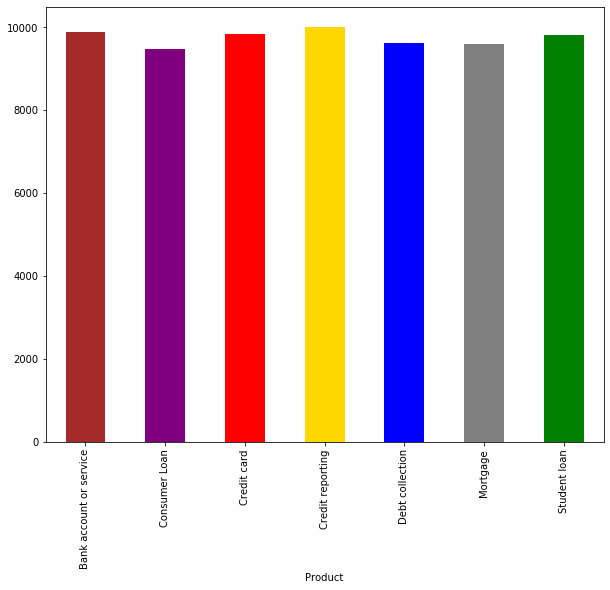

Shape of data(68197, 3)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
data.groupby('Product').Narrative.count().plot.bar(color=["Brown", "Purple", "Red", "Gold", "Blue", "Grey", "Green"])
plt.show()
print("Shape of data{}".format(data.shape))

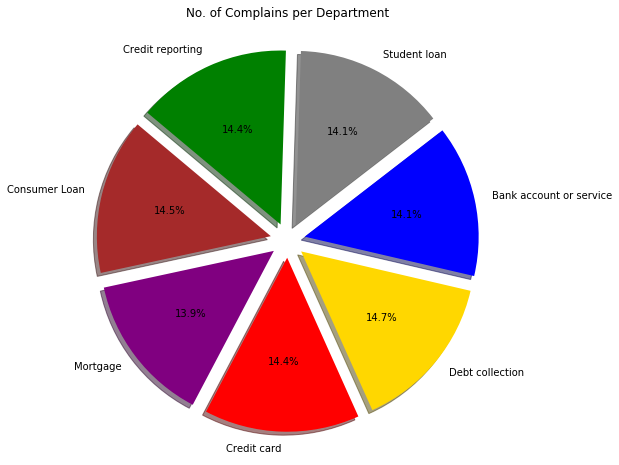

In [ ]:
fig=plt.figure(figsize=(10,8))
labels=data['Product'].unique()
pie_data=data.groupby('Product').Narrative.count()
colors=["Brown", "Purple", "Red", "Gold", "Blue", "Grey", "Green"]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(pie_data,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("No. of Complains per Department")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68197 entries, 0 to 68196
Data columns (total 3 columns):
Product        68197 non-null object
Narrative      68197 non-null object
category_id    68197 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
#Now we start the feature extraction part
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()

In [ ]:
data['first']=data['Narrative']
nrows=len(data)
lemmatized_text_list = []
for row in range(0,nrows):
  lemmatized_list=[]
  text=data.loc[row]['first']
  text_words = text.split(" ")
  for word in text_words:
    lemmatized_list.append(wordnet_lemmatizer.lemmatize(word,pos="v"))
  lemmatized_text = " ".join(lemmatized_list)
  lemmatized_text_list.append(lemmatized_text)

In [ ]:
data['first']=lemmatized_text_list

In [ ]:
nltk.download('stopwords')

stop_words = list(stopwords.words('english'))

In [ ]:
example ="me eating a meal"
word="me"

regex= r"\b" + word + r"\b"
re.sub(regex,"StopWord",example)

'StopWord eating a meal'

In [ ]:
for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data['first'] = data['first'].str.replace(regex_stopword, '')

In [ ]:
data.loc[5]['Narrative']

'i went through a divorce several years ago and requested a home loan modification through bank of america. bank of america refused to get back to me on several occasions causing the process to take a year, destroying my credit in the process. only when they got the foreclosure judgment and sent it to sheriff sale did they process it correctly and i paid on time for over a year. we decided to sell the home in 2015 and listed it for sale. after about 75 days, we received an offer and accepted. we promptly got an apartment, paid a deposit and signed a lease. we moved into the new apartment about 5 days before closing. as we were preparing for closing, it was discovered by the purchasing lender ( unknown to me ) that bank of america had sold our overdue principal to hud. this required us to sell our home for over  to break even. the house only appraised at around  because there have been so many foreclosures in our area. i contacted bank of america to determine what we could do and inform

In [ ]:
data.loc[5]['first']

' go   divorce several years ago  request  home loan modification  bank  america. bank  america refuse  get back    several occasion cause  process  take  year, destroy  credit   process.    get  foreclosure judgment  send   sheriff sale   process  correctly   pay  time    year.  decide  sell  home  2015  list   sale.   75 days,  receive  offer  accepted.  promptly get  apartment, pay  deposit  sign  lease.  move   new apartment  5 days  closing.    prepare  closing,   discover   purchase lender ( unknown   )  bank  america  sell  overdue principal  hud.  require us  sell  home     break even.  house  appraise  around       many foreclosures   area.  contact bank  america  determine   could   inform      buyer   could process  short sale immediately.  say   would probably   able   " hopefully  buyer  still around \'\'.  go    process  continually request update information  months   process drag .  lose  buyer  could make  mortgage payments   rent payment   apartment   continue  work  

In [ ]:
data.head()

,Product,Narrative,category_id,first
0,Consumer Loan,"i purchased a new car on . the car dealer called citizens bank to get a 10 day payoff on my loan, good till . the dealer sent the check the next day. when i balanced my checkbook on . i noticed that citizens bank had taken the automatic payment out of my checking account at bank. i called citizens and they stated that they did not close the loan until . ( stating that they did not receive the check until . . ). i told them that i did not believe that the check took that long to arrive. told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( , ) i called citizens bank again and talked to a supervisor named , because on . i received a letter that the loan had been paid in full ( dated , ) but no refund check was included. stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed. the .. i questioned her about the delay in posting the dealer payment and ...",1,"purchase new car . car dealer call citizens bank get 10 day payoff loan, good till . dealer send check next day. balance checkbook . notice citizens bank take automatic payment check account bank. call citizens state close loan . ( state receive check . . ). tell believe check take long arrive. tell check issue amount overpaid, deduct additional interest. today ( , ) call citizens bank talk supervisor name , . receive letter loan pay full ( date , ) refund check included. state hold payment 10 business days loan satisfy check would mail wed. .. question delay post dealer payment first state sometimes take 3 4 business days post, say receive check till tell believe ask money. state hold payment 10 business days. ask , simply say policy. ask would receive interest money state . believe citizens bank deliberately delay post paym..."
1,Mortgage,"started the refinance of home mortgage process with cash out option on 2016. necessary documents were submitted by . after initial review, got good faith estimate with loan amount and closing cost. based on this estimate, a deposit of was made towards appraisal. appraisal came with lesser amount by . agreed to reduce the loan amount to that extent. however, got a revised estimate which was less by and with additional closing cost towards points etc. in between got numerous revised estimates with different loan amounts and closing cost. it took more than 2 months to reach any definite closing document. hence, want to get back the deposit of .",3,"start refinance home mortgage process cash option 2016. necessary document submit . initial review, get good faith estimate loan amount close cost. base estimate, deposit make towards appraisal. appraisal come lesser amount . agree reduce loan amount extent. however, get revise estimate less additional close cost towards point etc. get numerous revise estimate different loan amount close cost. take 2 months reach definite close document. hence, want get back deposit ."
2,Credit card,"was a happy card member for years, in late 2016 converted the card portfolio to barclaycard ( ). we almost never carry a balance over, but we started to in and barclay has been overcharging the interest expense every month. instead of charging interest on the carried balance they charged it on the entire average balance. so if we charged last month and carried from previous months then they charged us 15 % of the = , should have been in interest charges. they are double dipping, getting the interchange fee ( 1.5 % of purchase, equal to an 18 % apr ), plus they are getting the interest on the purchases at 15 %, that is the equivalent of an 33 % interest charge. \ni feel this practice is very unethical, if not illegal. we converted, not by our choice, from to barclaycard mastercard, so if we leave we lose all the points we acquired in previous years. completely unfair and is why the big financials have the hated reputation they have now. hope yo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['first'], 
                                                    data['category_id'], 
                                                    test_size=0.25, 
                                                    random_state=8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=(1,2),
                        stop_words=None,
                        lowercase=False,
                        max_df=1.,
                        min_df=10,
                        max_features=300,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(51147, 300)
(17050, 300)


In [ ]:
data.head()

,Product,Narrative,category_id,first
0,Consumer Loan,"i purchased a new car on . the car dealer called citizens bank to get a 10 day payoff on my loan, good till . the dealer sent the check the next day. when i balanced my checkbook on . i noticed that citizens bank had taken the automatic payment out of my checking account at bank. i called citizens and they stated that they did not close the loan until . ( stating that they did not receive the check until . . ). i told them that i did not believe that the check took that long to arrive. told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( , ) i called citizens bank again and talked to a supervisor named , because on . i received a letter that the loan had been paid in full ( dated , ) but no refund check was included. stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed. the .. i questioned her about the delay in posting the dealer payment and ...",1,"purchase new car . car dealer call citizens bank get 10 day payoff loan, good till . dealer send check next day. balance checkbook . notice citizens bank take automatic payment check account bank. call citizens state close loan . ( state receive check . . ). tell believe check take long arrive. tell check issue amount overpaid, deduct additional interest. today ( , ) call citizens bank talk supervisor name , . receive letter loan pay full ( date , ) refund check included. state hold payment 10 business days loan satisfy check would mail wed. .. question delay post dealer payment first state sometimes take 3 4 business days post, say receive check till tell believe ask money. state hold payment 10 business days. ask , simply say policy. ask would receive interest money state . believe citizens bank deliberately delay post paym..."
1,Mortgage,"started the refinance of home mortgage process with cash out option on 2016. necessary documents were submitted by . after initial review, got good faith estimate with loan amount and closing cost. based on this estimate, a deposit of was made towards appraisal. appraisal came with lesser amount by . agreed to reduce the loan amount to that extent. however, got a revised estimate which was less by and with additional closing cost towards points etc. in between got numerous revised estimates with different loan amounts and closing cost. it took more than 2 months to reach any definite closing document. hence, want to get back the deposit of .",5,"start refinance home mortgage process cash option 2016. necessary document submit . initial review, get good faith estimate loan amount close cost. base estimate, deposit make towards appraisal. appraisal come lesser amount . agree reduce loan amount extent. however, get revise estimate less additional close cost towards point etc. get numerous revise estimate different loan amount close cost. take 2 months reach definite close document. hence, want get back deposit ."
2,Credit card,"was a happy card member for years, in late 2016 converted the card portfolio to barclaycard ( ). we almost never carry a balance over, but we started to in and barclay has been overcharging the interest expense every month. instead of charging interest on the carried balance they charged it on the entire average balance. so if we charged last month and carried from previous months then they charged us 15 % of the = , should have been in interest charges. they are double dipping, getting the interchange fee ( 1.5 % of purchase, equal to an 18 % apr ), plus they are getting the interest on the purchases at 15 %, that is the equivalent of an 33 % interest charge. \ni feel this practice is very unethical, if not illegal. we converted, not by our choice, from to barclaycard mastercard, so if we leave we lose all the points we acquired in previous years. completely unfair and is why the big financials have the hated reputation they have now. hope yo

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Bank account or service' category:
  . Most correlated unigrams:
. dispute
. remove
. report
. experian
. equifax
  . Most correlated bigrams:
. well fargo
. credit report

# 'Consumer Loan' category:
  . Most correlated unigrams:
. financial
. auto
. finance
. vehicle
. car
  . Most correlated bigrams:
. student loan
. credit card

# 'Credit card' category:
  . Most correlated unigrams:
. owe
. agency
. collect
. collection
. debt
  . Most correlated bigrams:
. bank america
. well fargo

# 'Credit reporting' category:
  . Most correlated unigrams:
. house
. home
. property
. modification
. mortgage
  . Most correlated bigrams:
. credit report
. credit card

# 'Debt collection' category:
  . Most correlated unigrams:
. loan
. charge
. citi
. capital
. card
  . Most correlated bigrams:
. student loan
. credit card

# 'Mortgage' category:
  . Most correlated unigrams:
. end
. email
. due
. document
. yet
  . Most correlated bigrams:
. credit card
. even though

# 'Student loan' catego

In [ ]:
bigrams

['call back',
 'even though',
 'phone call',
 'credit card',
 'make payment',
 'credit score',
 'make payments',
 'customer service',
 'student loan',
 'credit report',
 'well fargo',
 'bank america',
 'check account']

In [ ]:
unigrams

['matter',
 'however',
 'get',
 'finally',
 'yet',
 'believe',
 'need',
 'feel',
 'already',
 'good',
 'different',
 'cancel',
 'fact',
 'capital',
 'since',
 'statements',
 'receive',
 'ago',
 'ask',
 'answer',
 'number',
 'understand',
 'place',
 'even',
 'action',
 'thank',
 'make',
 'additional',
 'advise',
 'purchase',
 'stop',
 'change',
 'anything',
 'balance',
 'name',
 'able',
 'federal',
 'set',
 'help',
 'several',
 'unable',
 'keep',
 'though',
 'much',
 'practice',
 'end',
 'know',
 'sign',
 'attach',
 'look',
 'ca',
 'right',
 'notify',
 'explain',
 'first',
 'form',
 'want',
 'response',
 'term',
 'find',
 'office',
 'also',
 'mail',
 'statement',
 'phone',
 'notice',
 'consumer',
 'result',
 'legal',
 'last',
 'resolve',
 'require',
 'still',
 'situation',
 'speak',
 'multiple',
 'one',
 'status',
 'write',
 'regard',
 'live',
 'time',
 'error',
 'many',
 'immediately',
 'may',
 'people',
 'review',
 'supervisor',
 'leave',
 'like',
 'bill',
 'state',
 'months',
 'syste

In [ ]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import ShuffleSplit 


In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnbc_pred = mnbc.predict(features_test)

In [ ]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.7716777132578646


In [ ]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.7728445747800586


In [ ]:
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      2483
           1       0.73      0.64      0.69      2312
           2       0.71      0.71      0.71      2333
           3       0.85      0.84      0.84      2427
           4       0.75      0.73      0.74      2460
           6       0.80      0.82      0.81      2489
           7       0.87      0.86      0.86      2546

    accuracy                           0.77     17050
   macro avg       0.77      0.77      0.77     17050
weighted avg       0.77      0.77      0.77     17050



In [ ]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

data_models_mnbc = pd.DataFrame(d, index=[0])

In [ ]:
data_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.771678,0.772845


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnbc= GaussianNB()
gnbc

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnbc.fit(features_train, labels_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnbc_pred = gnbc.predict(features_test)

print("The training accuracy is: ")
print(accuracy_score(labels_train, gnbc.predict(features_train)))

print("The test accuracy is: ")
print(accuracy_score(labels_test, gnbc_pred))

The training accuracy is: 
0.7311670283692103
The test accuracy is: 
0.7328445747800586


In [ ]:
print("Classification report")
print(classification_report(labels_test,gnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      2483
           1       0.77      0.57      0.65      2312
           2       0.69      0.58      0.63      2333
           3       0.76      0.85      0.80      2427
           4       0.66      0.72      0.69      2460
           6       0.80      0.73      0.76      2489
           7       0.83      0.86      0.84      2546

    accuracy                           0.73     17050
   macro avg       0.74      0.73      0.73     17050
weighted avg       0.74      0.73      0.73     17050



In [ ]:
d = {
     'Model': 'Gaussian Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, gnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, gnbc_pred)
}

data_models_gnbc = pd.DataFrame(d, index=[1])

In [ ]:
data_models_gnbc

,Model,Training Set Accuracy,Test Set Accuracy
1,Gaussian Naïve Bayes,0.731167,0.732845


In [ ]:
# SVM
from sklearn import svm

In [ ]:
SVM = svm.SVC(C=1.0,kernel='linear',degree=3, gamma ='auto')
SVM.fit(features_train, labels_train)
pred_SVM=SVM.predict(features_test)

print("The training accuracy is: ")
print(accuracy_score(labels_train, SVM.predict(features_train)))

print("The test accuracy is: ")
print(accuracy_score(labels_test, pred_SVM))

The training accuracy is: 
0.8162355563376151
The test accuracy is: 
0.8013489736070382


In [ ]:
print("Classification report")
print(classification_report(labels_test,pred_SVM))

Classification report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2483
           1       0.74      0.72      0.73      2312
           2       0.71      0.75      0.73      2333
           3       0.89      0.86      0.87      2427
           4       0.78      0.77      0.78      2460
           6       0.85      0.83      0.84      2489
           7       0.91      0.86      0.89      2546

    accuracy                           0.80     17050
   macro avg       0.80      0.80      0.80     17050
weighted avg       0.80      0.80      0.80     17050



In [ ]:
d = {
     'Model': 'Support Vector Machine',
     'Training Set Accuracy': accuracy_score(labels_train, SVM.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, pred_SVM)
}

data_models_SVM = pd.DataFrame(d, index=[2])

In [ ]:
data_models_SVM

,Model,Training Set Accuracy,Test Set Accuracy
2,Support Vector Machine,0.816236,0.801349


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg= LogisticRegression(verbose=1,solver='liblinear', random_state=0, C=5,max_iter=1000)
log_reg.fit(features_train, labels_train)
lr_pred=log_reg.predict(features_test)

print("The training accuracy is: ")
print(accuracy_score(labels_train, log_reg.predict(features_train)))

print("The test accuracy is: ")
print(accuracy_score(labels_test, lr_pred))

[LibLinear]The training accuracy is: 
0.8114063385926839
The test accuracy is: 
0.8056304985337244


In [ ]:
print("Classification report")
print(classification_report(labels_test, lr_pred))

Classification report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2483
           1       0.76      0.71      0.73      2312
           2       0.72      0.76      0.74      2333
           3       0.88      0.88      0.88      2427
           4       0.78      0.78      0.78      2460
           6       0.83      0.85      0.84      2489
           7       0.90      0.88      0.89      2546

    accuracy                           0.81     17050
   macro avg       0.81      0.80      0.80     17050
weighted avg       0.81      0.81      0.81     17050



In [ ]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, log_reg.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, lr_pred)
}

data_models_lr = pd.DataFrame(d, index=[3])

data_models_lr

,Model,Training Set Accuracy,Test Set Accuracy
3,Logistic Regression,0.811406,0.80563


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(features_train, labels_train)
dt_pred=dt.predict(features_test)

print("The training accuracy is: ")
print(accuracy_score(labels_train, dt.predict(features_train)))

print("The test accuracy is: ")
print(accuracy_score(labels_test, dt_pred))

The training accuracy is: 
0.9983772264257923
The test accuracy is: 
0.6929618768328446


In [ ]:
print("Classification report")
print(classification_report(labels_test, dt_pred))

Classification report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2483
           1       0.60      0.62      0.61      2312
           2       0.59      0.58      0.58      2333
           3       0.79      0.77      0.78      2427
           4       0.65      0.64      0.65      2460
           6       0.71      0.72      0.72      2489
           7       0.81      0.80      0.80      2546

    accuracy                           0.69     17050
   macro avg       0.69      0.69      0.69     17050
weighted avg       0.69      0.69      0.69     17050



In [ ]:
d = {
     'Model': 'Decision Tree',
     'Training Set Accuracy': accuracy_score(labels_train, dt.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, dt_pred)
}

data_models_dt = pd.DataFrame(d, index=[4])

data_models_dt

,Model,Training Set Accuracy,Test Set Accuracy
4,Decision Tree,0.998377,0.692962


In [ ]:
data_models_results=data_models_mnbc.append(data_models_gnbc.append(data_models_SVM.append(data_models_lr.append(data_models_dt))))

In [ ]:
data_models_results

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.771678,0.772845
1,Gaussian Naïve Bayes,0.731167,0.732845
2,Support Vector Machine,0.816236,0.801349
3,Logistic Regression,0.811406,0.805630
4,Decision Tree,0.998377,0.692962
